In [1]:
import torch
import numpy as np
import itertools
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os
from pyquaternion import Quaternion

In [49]:

# 定义文件夹路径
folder_path = 'dataset/nuscenes/image_scene/mini_val/'

# 存储所有 CSV 文件的数据的列表
all_data = []

# 存储每个 CSV 文件的长度的列表
file_lengths = []
img = []

# 遍历文件夹中的所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        # 读取 CSV 文件
        # data = pd.read_csv(file_path)
        data = []
        with open(file_path, 'r') as f:
            aa = csv.reader(f)
            for row in aa:
                if '/CAM_FRONT/' in row[0]:
                    data.append(row)

        # 将数据添加到列表中
        all_data.append(data)
        print(Quaternion([float(data[0][4]), float(data[0][5]), \
            float(data[0][6]), float(data[0][7])]))
        print(Quaternion([float(data[0][4]), float(data[0][5]), float(data[0][6]), float(data[0][7])]).yaw_pitch_roll[0])

        # 获取文件长度并添加到长度列表中
        file_lengths.append(len(data))

# 打印每个 CSV 文件的长度
for i, length in enumerate(file_lengths):
    print(f"Length of file {i + 1}: {length}")

# all_data 现在包含所有 CSV 文件的数据


0.801 +0.005i -0.003j -0.598k
-1.2825945641659031
-0.969 -0.005i -0.008j +0.248k
-0.5007661801568798
Length of file 1: 41
Length of file 2: 40


In [54]:
import numpy as np

# 长度为12的列表
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# 转换为4x3的NumPy数组
my_array = np.array(my_list).reshape(4, 3)

# 打印结果
print(my_array)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [9]:
tensorshape = (2,4,2,2)
a = torch.rand(tensorshape)*10
a = a.int()
print('aaaaa', a)
b = a.reshape(tensorshape[0] * tensorshape[1], *tensorshape[2:])
print(b.size())
c = a.size()
print(c==tensorshape)



aaaaa tensor([[[[4, 4],
          [8, 1]],

         [[8, 9],
          [1, 1]],

         [[7, 1],
          [9, 7]],

         [[3, 7],
          [2, 1]]],


        [[[0, 8],
          [2, 2]],

         [[8, 9],
          [9, 8]],

         [[3, 1],
          [5, 8]],

         [[8, 7],
          [9, 9]]]], dtype=torch.int32)
torch.Size([8, 2, 2])
True


numpy.float64

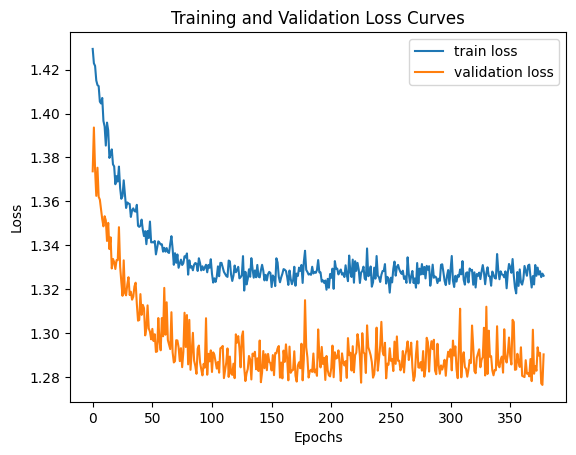

In [4]:
path = 'weights/one_camera/try07_LSTM_noImage_L1/loss'
data = []
with open(path, 'r') as f:
    aa = csv.reader(f)
    for row in aa:
        data.append(row)

data = data[1:-1]
data = np.array(data).astype(float)
plt.figure()
plt.plot(data[120:, 0], label='train loss')
plt.plot(data[120:, 1], label='validation loss')
# plt.plot(data[10:50, 0], label='train loss')
# plt.plot(data[10:50, 1], label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
type(data[1, 0])

In [3]:
import torch

# 假设你有四个三维图片张量，每个张量的形状为 (channels, height, width)
image1 = torch.rand(3, 64, 64)
image2 = torch.rand(3, 64, 64)
image3 = torch.rand(3, 64, 64)
image4 = torch.rand(3, 64, 64)

# 将这四个图片合并成一个批处理
batch = torch.stack([image1, image2, image3, image4])

# 打印批处理的形状
print(batch.shape)


torch.Size([4, 3, 64, 64])


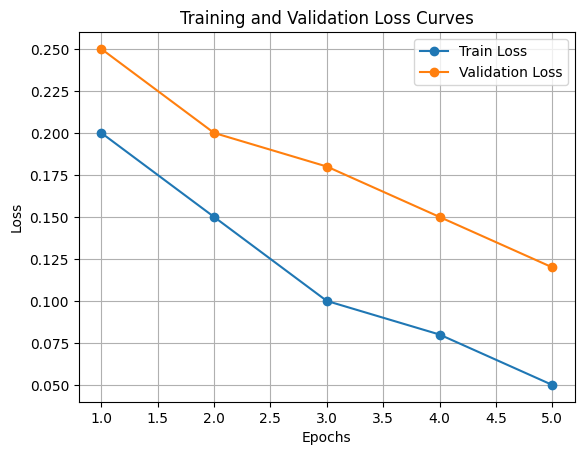

In [18]:
import matplotlib.pyplot as plt

# 示例数据（训练集和验证集损失值列表）
train_losses = [0.2, 0.15, 0.1, 0.08, 0.05]
val_losses = [0.25, 0.2, 0.18, 0.15, 0.12]

# 对应的epoch数（x轴）
epochs = list(range(1, len(train_losses) + 1))

# 绘制训练集损失曲线
plt.plot(epochs, train_losses, label='Train Loss', marker='o')

# 绘制验证集损失曲线
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')

# 显示图
plt.grid()
plt.show()
